# Problem Statement

## Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics





import warnings
warnings.filterwarnings('ignore')

## Training Dataset


In [2]:
train = pd.read_csv("E:\Projects\Bigmart/train.csv")


In [3]:
train.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.shape

(8523, 12)

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Test Dataset

In [7]:
test = pd.read_csv("E:\Projects\Bigmart/test.csv")

In [8]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
test.shape

(5681, 11)

In [11]:
train_len = len(train)
test_len = len(test)


print("length of training dataset: ", train_len)
print("\nlength of test dataset: ", test_len)

length of training dataset:  8523

length of test dataset:  5681


## Concatenating the datasets

### The test dataset doesn't have the Target feature 'Item_Outlet_Sales', we will merge the two datasets for preprocessing.

In [12]:
big_mart = pd.concat([train,test], axis = 0)

In [13]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
big_mart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [15]:
big_mart.reset_index(drop = True, inplace = True)
big_mart.tail()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [16]:
print("length of the concatenated dataframe: ", len(big_mart))

length of the concatenated dataframe:  14204


### Categorical Features

1. Item_Identifier  
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type

In [17]:
## Handling missing values

big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [18]:
big_mart['Item_Weight'].mean()

12.792854228644284

In [19]:
big_mart['Item_Weight'].median()

12.6

In [20]:
## Filling the missing values in the 'Item_Weight' column

big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace = True)

In [21]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [22]:
## Since the 'Outlet_Size' has categorical values, we will use Mode to fill in the null values.

mode_of_outlet_size = big_mart.pivot_table(values='Outlet_Size', columns = 'Outlet_Type',aggfunc= lambda x: x.mode()[0])

## We are doing this because, we cannot directly take the mode of 'Outlet_Size', which might give incorrect results.
## We need to check mode for each 'Outlet_Type' and then replace the values accordindly. 

In [23]:
mode_of_outlet_size


## The Table represents the mode of 'Outlet_Size' according to the 'Outlet_Type'

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [24]:
missing_values = big_mart['Outlet_Size'].isnull()

print(missing_values)

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool


In [25]:
## Fill the missing values in 'Outlet_Size'

big_mart.loc[missing_values, 'Outlet_Size'] = big_mart.loc[missing_values,'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

# This code is used to fill the missing values in ' Outlet_Size' with the mode of 'Outlet_Size' according to the 'Outlet_type',
# Which means, if the 'Outlet_Type' is 'Grocery Store'then most likely its going to be a "Small" size

In [26]:
## There are values in 'Item_Visibility' which are 0, which don't make sense. Hence replacing those values

big_mart['Item_Visibility'] = big_mart.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.replace(0, x.median()))


In [27]:
big_mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.091126,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [28]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [29]:
big_mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.091126,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


## Data Analysis

In [30]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.070022,141.004977,1997.830681,2181.288914
std,4.234226,0.049847,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.031239,94.012000,1987.000000,834.247400
50%,12.792854,0.057655,142.247000,1999.000000,1794.331000
75%,16.000000,0.097356,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
import seaborn as sns

In [32]:
sns.set()

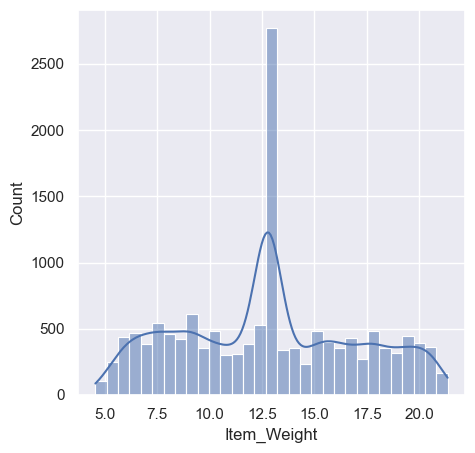

In [33]:

# Item Weight distribution

plt.figure(figsize = (5,5))
sns.histplot(big_mart['Item_Weight'], kde = True)
plt.show()

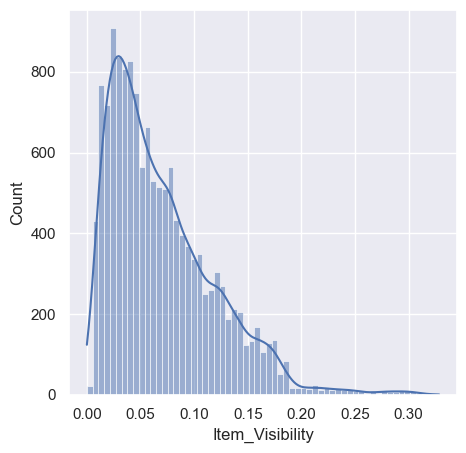

In [34]:

# Item Visibility distribution

plt.figure(figsize = (5,5))
sns.histplot(big_mart['Item_Visibility'], kde = True)
plt.show()

# Compute IQR and bounds
Q1 = big_mart['Item_Visibility'].quantile(0.25)
Q3 = big_mart['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers instead of removing them
big_mart['Item_Visibility'] = np.where(
    big_mart['Item_Visibility'] < lower_bound, lower_bound,
    np.where(big_mart['Item_Visibility'] > upper_bound, upper_bound, big_mart['Item_Visibility'])
)

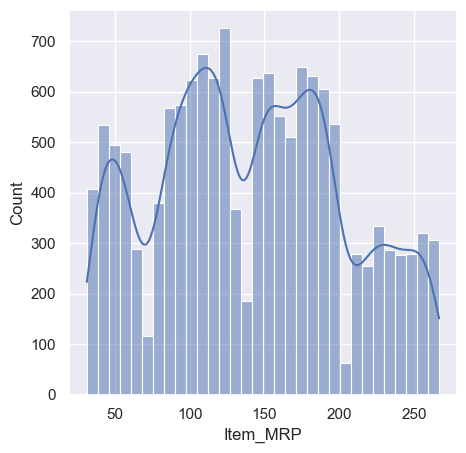

In [35]:
# Item MRP distribution

plt.figure(figsize = (5,5))
sns.histplot(big_mart['Item_MRP'], kde = True)
plt.show()

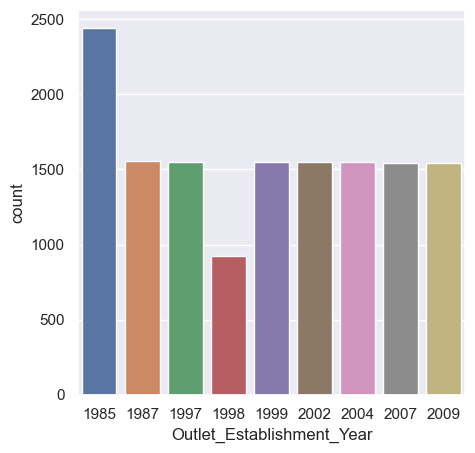

In [36]:
# Outlet_Establishment_Year distribution

plt.figure(figsize = (5,5))
sns.countplot(x = 'Outlet_Establishment_Year', data =big_mart)
plt.show()

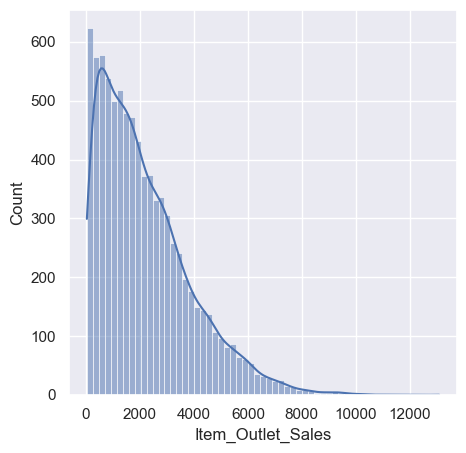

In [37]:
# Item_Outlet_Sales distribution

plt.figure(figsize = (5,5))
sns.histplot(x = 'Item_Outlet_Sales', data =big_mart, kde = True)
plt.show()

In [38]:
!pip install dtale
import dtale

dtale.show(big_mart)


## Using Dtale library to explore more (Outliers and Correlations)

Defaulting to user installation because normal site-packages is not writeable


### Categorical Features

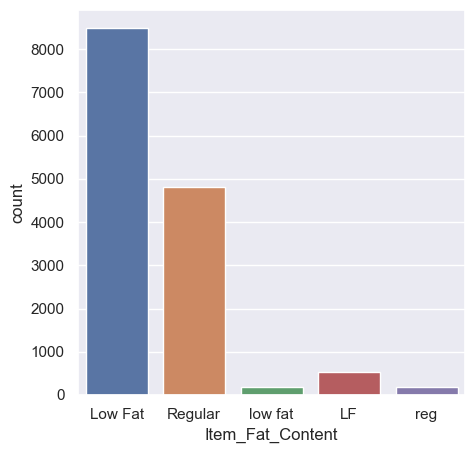

In [39]:
# Item_Fat_Content distribution

plt.figure(figsize = (5,5))
sns.countplot(x = 'Item_Fat_Content', data =big_mart)
plt.show()

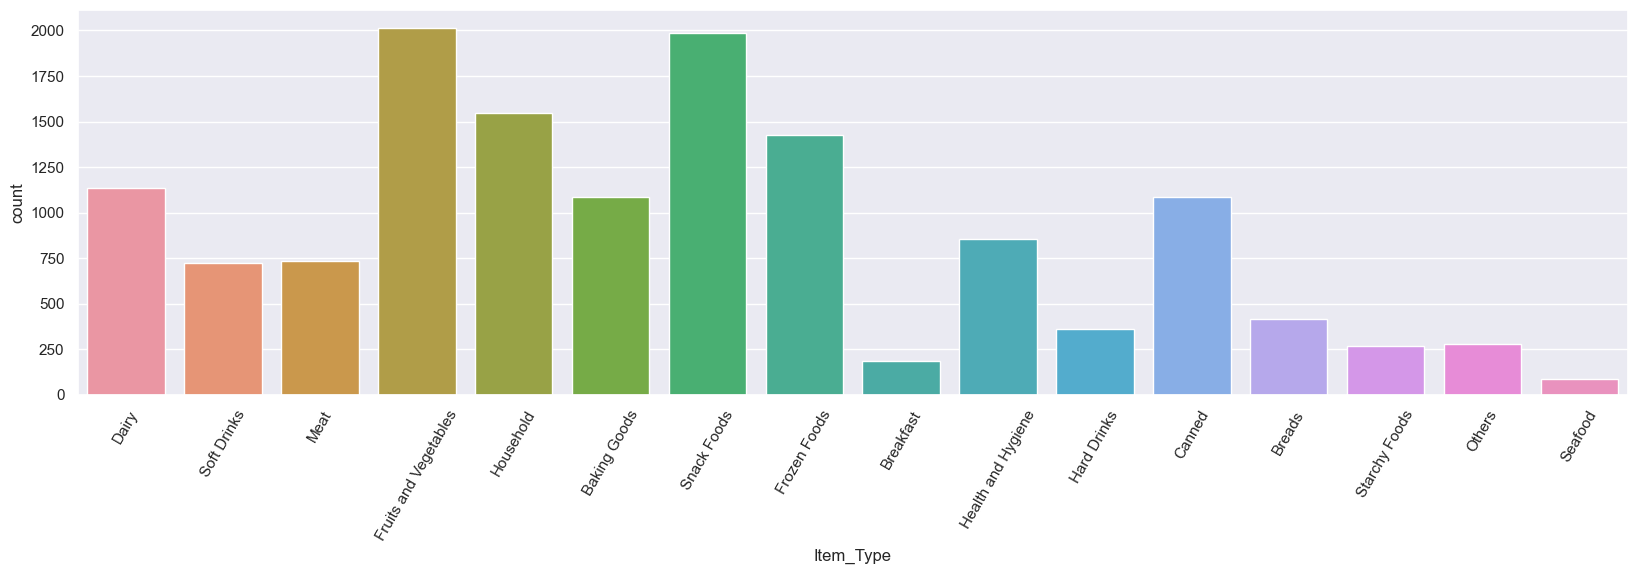

In [40]:
# Item_Type distribution

plt.figure(figsize = (20,5))
sns.countplot(x = 'Item_Type', data =big_mart)
plt.xticks(rotation = 60)
plt.show()

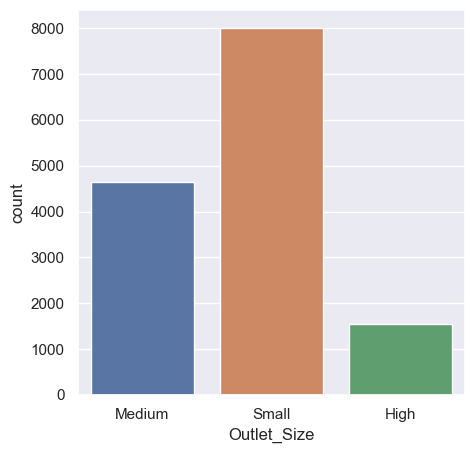

In [41]:
# Outlet_Size distribution

plt.figure(figsize = (5,5))
sns.countplot(x = 'Outlet_Size', data= big_mart)

plt.show()

# Data Preprocessing

In [42]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [44]:
big_mart.replace({'Item_Fat_Content': {'low fat' : 'Low Fat','LF' : 'Low Fat','reg': 'Regular'}},inplace = True)

# Changed the categorical values to 'Low Fat' and 'Regular'

In [45]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

## Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder 

In [47]:
encoder = LabelEncoder()

In [48]:


big_mart['Item_Fat_Content'] = encoder.fit_transform(big_mart['Item_Fat_Content'])

big_mart['Item_Type'] = encoder.fit_transform(big_mart['Item_Type'])



big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])

big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])




In [49]:
big_mart.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.022914,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.013177,9,53.8614,OUT013,1987,0,2,1,994.7052


## Training the Model


In [50]:

train = big_mart.iloc[:train_len, :]
test = big_mart.iloc[train_len: , : ]


## Since the 'Item_Outlet_Sales' is our Target Label, we will assign it to y

In [51]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.022914,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.013177,9,53.8614,OUT013,1987,0,2,1,994.7052


In [52]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,NaN
8524,FDW14,8.300000,1,0.038428,4,87.3198,OUT017,2007,2,1,1,NaN
8525,NCN55,14.600000,0,0.099575,11,241.7538,OUT010,1998,2,2,0,NaN
8526,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,2,1,1,NaN
8527,FDY38,12.792854,1,0.118599,4,234.2300,OUT027,1985,1,2,3,NaN


In [53]:
test_x_data = test.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

X = train.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
y = train['Item_Outlet_Sales']

### 'test' dataset doesn't have the 'Item_Outlet_Sales'  after dropping the feature and will be used for the final prediction after the training.

In [54]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.022914,6,182.0950,1998,2,2,0
4,8.930,0,0.013177,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [55]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [56]:
test_x_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,20.750000,0,0.007565,13,107.8622,1999,1,0,1
8524,8.300000,1,0.038428,4,87.3198,2007,2,1,1
8525,14.600000,0,0.099575,11,241.7538,1998,2,2,0
8526,7.315000,0,0.015388,13,155.0340,2007,2,1,1
8527,12.792854,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
14199,10.500000,1,0.013496,13,141.3154,1997,2,0,1
14200,7.600000,1,0.142991,15,169.1448,2009,1,2,2
14201,10.000000,0,0.073529,8,118.7440,2002,2,1,1
14202,15.300000,1,0.084831,3,214.6218,2007,2,1,1


## Prediction on Test Data

## 1. Random Forest

In [57]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976
8522,DRG01,14.800,0,0.044878,14,75.4670,OUT046,1997,2,0,1,765.6700


In [58]:
rf = RandomForestRegressor(random_state = 28)

rf.fit(X,y)
## Model will find the pattern between X and y. 
## Training our ML model.

RandomForestRegressor(random_state=28)

In [59]:
## Making predictions on training data
y_pred = rf.predict(X) 

In [60]:
## R-squared value, comparing the values from the actual vs predicted values
r2_value = metrics.r2_score(y, y_pred)

In [61]:
print("R2 value for Training data: ", r2_value)

R2 value for Training data:  0.9371358964538268


In [62]:
pred = rf.predict(test_x_data)

In [63]:
pred

array([1683.468642, 1413.32695 ,  699.070026, ..., 1811.501982,
       3389.48793 , 1389.185042])

## Hyperparameter Tuning

In [64]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],   # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]       # Whether to use bootstrap samples when building trees
}

In [65]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=20, scoring='r2', cv=5, verbose=2, n_jobs=-1, random_state= 28)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)

best_rf = random_search.best_estimator_
pred_rf = best_rf.predict(test_x_data)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best R² Score: 0.5849497223094042


In [66]:
pred_rf

array([1641.99290513, 1308.77971928,  686.75300467, ..., 1860.5804065 ,
       3566.48828388, 1351.20070324])

In [67]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

submission['Item_Outlet_Sales'] = pred_rf

In [68]:
print((submission['Item_Outlet_Sales'] <= 0).value_counts()) 

False    5681
Name: Item_Outlet_Sales, dtype: int64


In [69]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1641.992905
8524,FDW14,OUT017,1308.779719
8525,NCN55,OUT010,686.753005
8526,FDQ58,OUT017,2413.767595
8527,FDY38,OUT027,6268.602345
8528,FDH56,OUT046,1835.744917
8529,FDL48,OUT018,665.306872
8530,FDC48,OUT027,1760.861279
8531,FDN33,OUT045,1505.604625
8532,FDA36,OUT017,2949.999767


In [70]:
submission.to_csv('sabyasachi_bigmart_rf.csv', index = False)

## 2. Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics


# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state= 28)

# Train the model
gbr.fit(X, y)

# Predictions on training data
y_pred_gbr = gbr.predict(X)

# Calculate R-squared value
r2_value_gbr = metrics.r2_score(y, y_pred_gbr)
print("R2 value for Training data (GBR):", r2_value_gbr)

# Hyperparameter Tuning for GBR
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

random_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid_gbr, 
                                       n_iter=30, scoring='r2', cv=5, verbose=2, n_jobs=-1, random_state=42)

random_search_gbr.fit(X, y)

print("Best Parameters (GBR):", random_search_gbr.best_params_)
print("Best R² Score (GBR):", random_search_gbr.best_score_)

# Best GBR model
best_gbr = random_search_gbr.best_estimator_
pred_gbr = best_gbr.predict(test_x_data)

# Prepare Submission File
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = pred_gbr

# Save Submission File
submission.to_csv('sabyasachi_bigmart_gbr.csv', index=False)

print("Submission file created successfully!")


R2 value for Training data (GBR): 0.6297524560322642
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters (GBR): {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.05}
Best R² Score (GBR): 0.598316126261927
Submission file created successfully!


In [72]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1683.749027
8524,FDW14,OUT017,1393.394271
8525,NCN55,OUT010,592.563682
8526,FDQ58,OUT017,2513.500608
8527,FDY38,OUT027,6028.789625
8528,FDH56,OUT046,1867.170035
8529,FDL48,OUT018,662.694787
8530,FDC48,OUT027,2213.435117
8531,FDN33,OUT045,1523.140149
8532,FDA36,OUT017,3087.242957


Gradient boosting has given the best score yet!!

## 3. XGBoost

In [73]:
# Apply log transformation to the target variable
y_log = np.log1p(y)  # log(1 + y) to handle zero values

# Define XGBoost model with proper objective and regularization
xgb = XGBRegressor(
    objective='reg:squarederror', 
    reg_alpha=0.1,   # L1 regularization to avoid extreme values
    reg_lambda=0.5,  # L2 regularization to reduce overfitting
    n_estimators=500, # Increase trees for better generalization
    learning_rate=0.05, # Lower learning rate for stability
    max_depth=6 # Control model complexity
)

# Train the model on the transformed target
xgb.fit(X, y_log)

# Make predictions on test data
y_pred_log = xgb.predict(test_x_data)

# Reverse log transformation
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# Ensure all predictions are non-negative
y_pred = np.maximum(0, y_pred)

y_pred

array([1491.755  , 1226.8424 ,  629.13995, ..., 1571.6405 , 2159.847  ,
       1329.3473 ], dtype=float32)

In [74]:
# Create submission file
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = y_pred

# Save the final output
submission.to_csv('sabyasachi_bigmart_xgb.csv', index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


In [75]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1491.755005
8524,FDW14,OUT017,1226.842407
8525,NCN55,OUT010,629.139954
8526,FDQ58,OUT017,2260.298096
8527,FDY38,OUT027,6614.746094
8528,FDH56,OUT046,1376.335693
8529,FDL48,OUT018,610.130737
8530,FDC48,OUT027,1860.435547
8531,FDN33,OUT045,968.771423
8532,FDA36,OUT017,2743.446045


## Ensemble

In [76]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import pandas as pd

# Initialize base models
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Train base models
gbm.fit(X, y)
rf.fit(X, y)

# Perform cross-validation for stacking
kf = KFold(n_splits=5, shuffle=True, random_state=42)

gbm_pred_train = cross_val_predict(gbm, X, y, cv=kf, method="predict")
rf_pred_train = cross_val_predict(rf, X, y, cv=kf, method="predict")

# Create training dataset for meta-model
meta_X_train = np.column_stack((gbm_pred_train, rf_pred_train))

# Train meta-model (Lasso Regression)
from sklearn.linear_model import Lasso
meta_model = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
meta_model.fit(meta_X_train, y)

# Prepare test set meta features
gbm_pred_test = gbm.predict(test_x_data)
rf_pred_test = rf.predict(test_x_data)

meta_X_test = np.column_stack((gbm_pred_test, rf_pred_test))



# Final predictions using the meta-model
final_predictions = meta_model.predict(meta_X_test)

# Ensure no negative sales predictions
final_predictions = np.maximum(0, final_predictions)

# Prepare submission file
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': final_predictions
})

# Save the predictions
submission.to_csv('stacked_model_LassoR.csv', index=False)

print("Stacked model predictions (Lasso) saved successfully!")

Stacked model predictions (Lasso) saved successfully!


In [77]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1650.119879
8524,FDW14,OUT017,1340.960523
8525,NCN55,OUT010,675.346664
8526,FDQ58,OUT017,2454.522733
8527,FDY38,OUT027,6088.039281
8528,FDH56,OUT046,1865.037301
8529,FDL48,OUT018,676.094605
8530,FDC48,OUT027,1936.359556
8531,FDN33,OUT045,1517.316966
8532,FDA36,OUT017,2974.090926
